<a href="https://colab.research.google.com/github/sebswU/coviFacts/blob/master/botTrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the playground section for different models and datasets

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
import tensorflow
from tensorflow import keras
import urllib


preprocess, getting and dividing data, naming classes

In [ ]:
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_train_test, y_train_test) = fashion.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
class_names[y_train[0]]


4431872/4422102 [==============================] - 0s 0us/step


'Coat'

Practice sequential model design

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape = [28,28]),
                                 keras.layers.Dense(300, activation = 'relu'),
                                 keras.layers.Dense(100, activation = 'relu'),
                                 keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7149 - accuracy: 0.7637 - val_loss: 0.4951 - val_accuracy: 0.8352
Epoch 2/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4863 - accuracy: 0.8309 - val_loss: 0.4550 - val_accuracy: 0.8404
Epoch 3/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4400 - accuracy: 0.8462 - val_loss: 0.4101 - val_accuracy: 0.8594
Epoch 4/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4140 - accuracy: 0.8539 - val_loss: 0.4019 - val_accuracy: 0.8574
Epoch 5/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3942 - accuracy: 0.8613 - val_loss: 0.3790 - val_accuracy: 0.8678
Epoch 6/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3780 - accuracy: 0.8674 - val_loss: 0.3944 - val_accuracy: 0.8592
Epoch 7/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3636 - accuracy: 0.8708 - val_loss: 0.3615 - val_accuracy:

In [ ]:
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test,y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit(X_valid)
X_test = scaler.transform(X_test)


Install tensorflow text

In [ ]:
%pip install tensorflow-text


     |████████████████████████████████| 4.9 MB 3.9 MB/s 
     |████████████████████████████████| 462 kB 38.3 MB/s 


Experimentation with potential model design for Covifacts

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text
from tensorflow import keras
import json
import sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)#do not fit_transform validation set
x_test = scaler.transform(X_test)

In [ ]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs = [input_A, input_B],outputs=[output])

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
  model.compile(loss = 'mse', optimizer = optimizer)
  return model


In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)#can be used on

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
"""
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data = (X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
"""

242/242 [==============================] - 1s 4ms/step - loss: 0.5506 - val_loss: 0.5316
Epoch 13/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5427 - val_loss: 0.5390
Epoch 14/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5970 - val_loss: 0.5210
Epoch 15/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5437 - val_loss: 0.5409
Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5573 - val_loss: 0.6125
Epoch 17/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7626 - val_loss: 0.5290
Epoch 18/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5892 - val_loss: 0.5266
Epoch 19/100
242/242 [==============================] - 2s 9ms/step - loss: 0.5545 - val_loss: 0.5261
Epoch 20/100
242/242 [==============================] - 2s 8ms/step - loss: 0.5650 - val_loss: 0.5285
Epoch 21/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5368 - val_loss: 

KeyboardInterrupt: ignored

In [ ]:
"""
with open('textData.json') as textData:
  data = json.load(textData)
"""
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [ ]:
#model
input = pooled_output
hl1 = keras.layers.Dense(40, activation = 'relu')(input)

hl2 = keras.layers.Dense(40, activation = 'relu')(hl1)
hl3 = keras.layers.Dense(10, activation = 'relu')(hl2)
concat = keras.layers.Concatenate()([input, hl3])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input], outputs = [output])
optimizer = keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = ['mse'], optimizer = optimizer)
#loss function is mean squared error, optimizer is stochastic gd
model.save('test_model.h5')

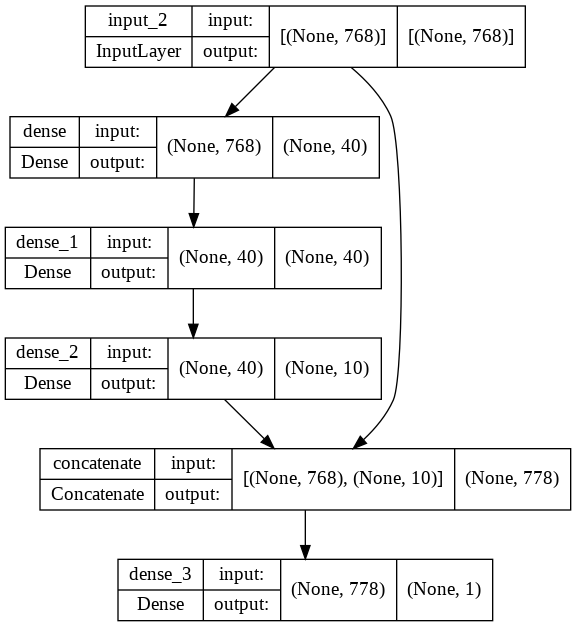

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
%pip install searchtweets-v2

search_tweets_v2:
  endpoint:  https://api.twitter.com/2/tweets/search/recent #Or https://api.twitter.com/2/tweets/search/all



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from tensorflow.keras import utils
import pathlib
from tensorflow.keras.layers import TextVectorization
#utils, pathlib, urllib is used for loading stuff in

import os
import numpy as np

vocab_size = 88544
max_length = 250
batch_size = 64
(trainData, trainLabel),(testData, testLabel) = imdb.load_data(num_words = vocab_size)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
trainData = sequence.pad_sequences(trainData, max_length)
testData = sequence.pad_sequences(testData, max_length)
#for the freecodecamp seq rnn

In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec
BUFFER_SIZE = 10000#how many experiences/instances should be collected before doing anything regarding training
BATCH_SIZE = 64#separate training dataset into sizes of x instances
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
#for the tf seq rnn

In [ ]:
VOCABSIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCABSIZE
)
encoder.adapt(train_dataset.map(lambda text, label: text))
#sets layer vocabulary tokens and pads if neccessary
vocab = np.array(encoder.get_vocabulary())
vocab[:20]
#sometimes not reversible due to unknown tokens and lack of character-based fallback

NameError: ignored

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),#can go forward/back
    tf.keras.layers.Dense(64, activation='relu'),#
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history=model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 48s 91ms/step - loss: 0.6312 - accuracy: 0.5826 - val_loss: 0.4602 - val_accuracy: 0.7896
Epoch 2/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3912 - accuracy: 0.8222 - val_loss: 0.3587 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3398 - accuracy: 0.8512 - val_loss: 0.3382 - val_accuracy: 0.8484
Epoch 4/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3227 - accuracy: 0.8596 - val_loss: 0.3489 - val_accuracy: 0.8542
Epoch 5/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3138 - accuracy: 0.8662 - val_loss: 0.3355 - val_accuracy: 0.8448
Epoch 6/10
391/391 [==============================] - 33s 84ms/step - loss: 0.3095 - accuracy: 0.8670 - val_loss: 0.3308 - val_accuracy: 0.8620
Epoch 7/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3071 - accuracy: 0.8673 - val_loss: 0.3248 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

above = tensorflow rnn tutorial
below = tensorflow youtube freecodecamp tutorial


In [ ]:
def createRNNmodel(training, testing, size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(size, 32),#vectorize word tokens
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),#lstm cell
    tf.keras.layers.Dense(1, activation = 'sigmoid')]#output
    )
  return model

In [ ]:
RNN = createRNNmodel(trainData, testData, vocab_size)
RNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2833408   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,841,761
Trainable params: 2,841,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNN.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
#can be either rmsprop or adam (this the freecodecamp one)
hist = RNN.fit(trainData, trainLabel, epochs = 10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 14s 12ms/step - loss: 0.4214 - acc: 0.8079 - val_loss: 0.3208 - val_acc: 0.8670
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2404 - acc: 0.9093 - val_loss: 0.2703 - val_acc: 0.8898
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1871 - acc: 0.9311 - val_loss: 0.2711 - val_acc: 0.8960
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1520 - acc: 0.9467 - val_loss: 0.2859 - val_acc: 0.8796
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1285 - acc: 0.9553 - val_loss: 0.2968 - val_acc: 0.8962
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1090 - acc: 0.9628 - val_loss: 0.3493 - val_acc: 0.8802
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0934 - acc: 0.9690 - val_loss: 0.3088 - val_acc: 0.8936
Epoch 8/10
625/625 [==============================] - 7s 12ms/step -

In [ ]:
word_index = imdb.get_word_index()
text = "my dog and i were offended by this movie i sued the director for his racist-dogist views"
def encode_text(text):#encodes words to number set 0 if no word has to be same
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens],max_length)[0]

"""
def decode_numbers(numbers):#decodes numbers if not 0 and sets back to letters
  padding = 0
  text = ""
  for num in numbers:
    if num != padding:
      text += reverse_word_index[num] + " "
  return text[:-1]
"""

encoded = encode_text(text)
print(encoded)


1654784/1641221 [==============================] - 0s 0us/step
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0 

In [ ]:
def predict(text):
  encodedText = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encodedText
  result = RNN.predict(pred)
  return result[0]

print(predict("According to all known laws of aviation, there is no way that a bee should be able to fly. Its wings are too small to get its fat little body off the ground. The bee, of course, flies anyway because bees don't care what humans think is impossible."))

[0.97073764]


# This is the training for the actual nlp model


Credit for tokenizing/preprocessing/neural network planning:\
Marco Vasquez @ Kaggle\
Tim @ Youtube\
Auréilin Géron @ O'Reily Media\
Kylie Ying @ Freecodecamp.org\
tensorflow.org website\
FARES SAYAH @ Kaggle\
Hayawi K, Shahriar S, Serhani MA, Taleb I, Mathew SS. ANTi-Vax: a novel Twitter dataset for COVID-19 vaccine misinformation detection. Public Health. 2022;203:23-30. doi:10.1016/j.puhe.2021.11.022\
Samikshya Siwakoti, Kamya Yadav, Isra Thange, Nicola Bariletto, Luca Zanotti, Alaa Ghoneim, and Jacob N. Shapiro. Localized Misinformation in a Global Pandemic: Report on COVID-19 Narratives around the World. Empirical Study of Conflict, Princeton University, pages 1-68, March 2021. URL https://esoc.princeton.edu/publications/localized-misinformation-global-pandemic-report-covid-19-narratives-around-world. \



Credit for datasets:\
Ambesh Shekar @ Kaggle\
Steven @ Kaggle



import modules for preprocessing and model development

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!pip -q install transformers
import os
os.chdir('/content/drive/My Drive')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow_hub as hub
import sklearn as sk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
     |████████████████████████████████| 4.4 MB 5.6 MB/s 
     |████████████████████████████████| 101 kB 10.6 MB/s 
     |████████████████████████████████| 596 kB 33.5 MB/s 
     |████████████████████████████████| 6.6 MB 7.7 MB/s 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


read and clean/preprocess data

In [2]:
os.chdir('/content/drive/My Drive/archive (1)')
import pandas as pd
databox = pd.DataFrame(pd.read_csv('news_articles.csv'))
more_false_data = pd.DataFrame(pd.read_csv('poynter_data.csv'))
esocData = pd.DataFrame(pd.read_csv('esoc.csv'))
nlmData = pd.DataFrame(pd.read_csv('ids.csv'))
trueorfalsenlm = pd.DataFrame(pd.read_csv('VaxMisinfoData.csv'))

In [3]:
trueorfalsenlm = trueorfalsenlm.assign(text=nlmData['text'])


See how they are all structured


In [4]:
trueorfalsenlm = trueorfalsenlm.drop(axis = 1, columns = ['id'])
trueorfalsenlm['is_misinfo'] = trueorfalsenlm['is_misinfo'].astype(float)
trueorfalsenlm.rename(columns = {'is_misinfo':'label'}, inplace = True)
trueorfalsenlm = trueorfalsenlm[:12381]

In [5]:
databox['label'].replace ({'Fake': 1, 'Real': 0}, inplace=True)
databox = databox.drop(axis = 1, columns = ['author','published','title','text','language','site_url','main_img_url','type','title_without_stopwords','hasImage'])
databox.rename(columns = {'text_without_stopwords':'text'}, inplace = True)

databox.head()


,label,text
0,0.0,print pay back money plus interest entire fami...
1,0.0,attorney general loretta lynch plead fifth bar...
2,0.0,red state fox news sunday reported morning ant...
3,0.0,email kayla mueller prisoner tortured isis cha...
4,0.0,email healthcare reform make america great sin...


In [6]:
more_false_data.head()
more_false_data['label'] = float(0)
more_false_data

,label,text
0,0.0,A post that has a list of recommendations to ...
1,0.0,The first person to received a Chinese COVID-...
2,0.0,A video from family doctor Natalia Prego Canc...
3,0.0,RNA-based COVID-19 vaccines can turn humans i...
4,0.0,A post that shows a doctor from Santiago del ...
...,...,...
7539,0.0,The coronavirus was created in a lab and pate...
7540,0.0,A Chinese market caused the new coronavirus (...
7541,0.0,The peak of the new coronavirus will happen i...
7542,0.0,Stores and supermarkets in Veracruz (Mexico) ...


In [7]:
esocData = esocData[:5613]
esocData = esocData.assign(label=float(0))

esocData.drop(axis = 1, columns = ['s_no','Notes','Region','Reported_On','Additional_Reporting','Retrieve_from_1','Retrieve_from_2','Retrieve_from_3','Twitter_Reference','Direct_Post_1','Direct_Post_2','Direct_Post_3','Direct_Post_4','Title','Publication_Date','Entry_Date','Primary_Country','Secondary_Country','Primary_Language','Secondary_Language','Main_Narrative','Recoded_Main_Narrative','Recoded_Narrative_Coder','ChainMsg_or_Email','Motive','Motive_Description','Source','Source_Description','Distrib_Channel','Misinfo_Type','Key_Words','Summary','Coder'], inplace=True)
esocData.rename(columns = {'Narrative_Description':'text'}, inplace = True)

In [8]:
#esocData = esocData.iloc[:, [1,0]]
esocData['text']

0       Hindi language YouTube account saying COVID-19...
1       Twitter user posting a compilation video of pe...
2       Twitter user posting a video of a celebrity ea...
3           Chain message of NYPD containment responses. 
4       Chain message of Indian Health Ministry respon...
                              ...                        
5608                          Coffee can prevent COVID-19
5609                 The number of COVID-19 deaths is 946
5610         Facemasks donated by China contain the virus
5611    low-quality masks were distributed by the Braz...
5612    Flu vaccine would increase the risk of getting...
Name: text, Length: 5613, dtype: object

add labels and rename columns

In [9]:
data = pd.concat([databox, esocData, trueorfalsenlm, more_false_data])
data

,label,text
0,0.0,print pay back money plus interest entire fami...
1,0.0,attorney general loretta lynch plead fifth bar...
2,0.0,red state fox news sunday reported morning ant...
3,0.0,email kayla mueller prisoner tortured isis cha...
4,0.0,email healthcare reform make america great sin...
...,...,...
7539,0.0,The coronavirus was created in a lab and pate...
7540,0.0,A Chinese market caused the new coronavirus (...
7541,0.0,The peak of the new coronavirus will happen i...
7542,0.0,Stores and supermarkets in Veracruz (Mexico) ...


remove @, 'photo by name/Getty images',dates, links

In [10]:
import re
import string

#TODO: strip the dataset of all emails, twitter acc prof, image references, capital letters
web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
user = re.compile(r"(?i)@[a-z0-9_]+")
regex_list = [web_address, user]
# we then use the sub method to replace anything matching

def clean(dataset):
  """clean from stopwords and other stuff, convert to list, back to string"""
  if isinstance(dataset, float):
    dataset = 'a'
  STOPWORDS = stopwords.words('english') 
    # Check characters to see if they are in punctuation
  nopunc = [char for char in dataset if char not in string.punctuation and all(regex.search(char.lower()) is None for regex in regex_list)]
  
    # Join the characters again to form the string.
  nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
  return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
  return " ".join(word
                for word in nopunc.split()
                if word.lower() not in stopwords.words("english") and all(regex.search(word.lower()) is None for regex in regex_list))

In [11]:
esocData['text'] = esocData['text'].apply(clean)
trueorfalsenlm['text'] = trueorfalsenlm['text'].apply(clean)
more_false_data['text'] = more_false_data['text'].apply(clean)

In [12]:
data = pd.concat([esocData, trueorfalsenlm, more_false_data, databox], sort = False, ignore_index = True)
data = data.iloc[:27584]
data['label'] = data['label'].astype(int)
data = data[['label','text']]

In [13]:
import numpy as np
train, val, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [28]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['text']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [29]:
train = df_to_dataset(train)
val = df_to_dataset(val)
test = df_to_dataset(test)

AttributeError: ignored

streamline the text, make all lowercase

checking dataset structure

split data into training and testing

count # of unique words

:The embeddings can be used as a piece to build a larger machine learning system that is able to draw insights about COVID-19 research.

In [30]:
import tensorflow as tf
import tensorflow_hub as hub
#english_sentences = tf.constant(["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."])
"""
this is the reference for the encoder and the embedder
the preprocessor converts the words into an array that is fed to the model
the encoder takes it and converts it to unique # representation (like oneHot)
the embedding vectorizes the word-number combination in a way that emphasizes 
context (think about dots on a 3d graph and those dots' location represented 
context in regards to each other)
model will be trained on data, and embeddings will be fitted to accomodate
after saved, specialized embedding/encoding/trained model will process new data 
outside of set

from stkovf: LSTM layers expect 3D input tensors, but Dense outputs only 2D
fix:
"""

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)

embed = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2", 
                       input_shape = [], dtype=tf.string, trainable=True)

In [17]:
embed(list(train)[0][0])

<tf.Tensor: shape=(128, 50), dtype=float32, numpy=
array([[ 0.08083298,  0.06638847,  0.05614833, ..., -0.120366  ,
        -0.02776473, -0.09363431],
       [ 0.07956337,  0.09325305,  0.04332416, ..., -0.01680192,
         0.3743864 ,  0.18070449],
       [ 0.18587586, -0.2542708 ,  0.08522544, ...,  0.00833511,
         0.5958649 ,  0.08772397],
       ...,
       [ 0.26028967, -0.24751776,  0.13115399, ...,  0.257682  ,
         0.15354963,  0.30167735],
       [ 0.0592407 , -0.41306704,  0.06368522, ..., -0.04397118,
         0.2743146 , -0.05102824],
       [-0.0215838 , -0.02325741, -0.05331152, ...,  0.11987179,
         0.15687893,  0.03875262]], dtype=float32)>

In [20]:


model = tf.keras.Sequential()                      
model.add(embed)
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])




In [21]:
model.evaluate(train)

130/130 [==============================] - 4s 26ms/step - loss: 0.6791 - accuracy: 0.6692


[0.6791209578514099, 0.6691842675209045]

In [22]:
model.evaluate(val)

44/44 [==============================] - 0s 10ms/step - loss: 0.6794 - accuracy: 0.6719


[0.6794252395629883, 0.6719231605529785]

In [23]:
hist = model.fit(train, epochs = 5, validation_data = val)

Epoch 1/5
130/130 [==============================] - 98s 745ms/step - loss: 0.5305 - accuracy: 0.7709 - val_loss: 0.4092 - val_accuracy: 0.7939
Epoch 2/5
130/130 [==============================] - 85s 651ms/step - loss: 0.3776 - accuracy: 0.8014 - val_loss: 0.3738 - val_accuracy: 0.7901
Epoch 3/5
130/130 [==============================] - 81s 622ms/step - loss: 0.3034 - accuracy: 0.8444 - val_loss: 0.4041 - val_accuracy: 0.7778
Epoch 4/5
130/130 [==============================] - 82s 629ms/step - loss: 0.2305 - accuracy: 0.8935 - val_loss: 0.4654 - val_accuracy: 0.7805
Epoch 5/5
130/130 [==============================] - 81s 628ms/step - loss: 0.1701 - accuracy: 0.9305 - val_loss: 0.5668 - val_accuracy: 0.7696


In [31]:
vectorizer = tf.keras.layers.TextVectorization(max_tokens = 2000)
vectorizer.adapt(train.map(lambda txt, label: txt))

In [32]:
modeLSTM = tf.keras.Sequential([
  vectorizer,
  tf.keras.layers.Embedding(
      input_dim = len(vectorizer.get_vocabulary()),
      output_dim = 32,
      mask_zero = True
  ),                      
  tf.keras.layers.LSTM(32),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

])
modeLSTM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Might have overfit bc 128 x 130 is 13056, and that is over half the training 


In [26]:
checkpoint_dir = './checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

history = modeLSTM.fit(train, epochs=5, validation_data = val, callbacks=[checkpoint_callback])

Epoch 1/5
130/130 [==============================] - 169s 1s/step - loss: 0.4871 - accuracy: 0.7720 - val_loss: 0.3741 - val_accuracy: 0.7892
Epoch 2/5
130/130 [==============================] - 179s 1s/step - loss: 0.3653 - accuracy: 0.7966 - val_loss: 0.3673 - val_accuracy: 0.7888
Epoch 3/5
130/130 [==============================] - 162s 1s/step - loss: 0.3395 - accuracy: 0.8167 - val_loss: 0.3745 - val_accuracy: 0.7865
Epoch 4/5
130/130 [==============================] - 190s 1s/step - loss: 0.3173 - accuracy: 0.8317 - val_loss: 0.3882 - val_accuracy: 0.7892
Epoch 5/5
130/130 [==============================] - 171s 1s/step - loss: 0.2963 - accuracy: 0.8433 - val_loss: 0.4181 - val_accuracy: 0.7917


In [27]:
modeLSTM.evaluate(test)

44/44 [==============================] - 19s 443ms/step - loss: 0.4213 - accuracy: 0.7925


[0.4213379919528961, 0.7924596667289734]

In [35]:
#checkpoint_path = "./checkpoints/cp-{epoch:05d}.ckpt"
modeLSTM.save_weights(checkpoint_dir.format(epoch=0))
modeLSTM.save('/content/drive/My Drive/archive (1)')

INFO:tensorflow:Assets written to: /content/drive/My Drive/archive (1)/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/archive (1)/assets
